In [7]:
import matplotlib.pyplot as plt 
from typing import Dict, List, Tuple
import pandas as pd
import math
import warnings
warnings.filterwarnings(action = "ignore")

* NOTE:  If you have a real dataset you may replace this one: I kept simple for illustration 
 only. We use the same 'toy' dataset as in previous class.

In [8]:
# Entering the toy dataset we've used in the class 
data: Dict[str, List] = {
    'id': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "surv1": [6,6,6,7,10,13,16,22,23,6,9,10,11,17,19,20,25,32,32,34,35],
    "delta1": [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    "surv2": [1,2,3,4,5,8,8,11,12,15,17,12,23,1,2,4,5,8,8,11,12],
    "delta2": [1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0]}

In [9]:
def _build(data: Dict[str, List[float]] = data) -> pd.DataFrame:
    '''
    @Martin
    ------------
    This method prepare a simple 'toy' survival data for 2 groups

    Argument
    ---------
    data: Dict[str, List]:-> survival information for the groups

    Return
    --------
    pd.DataFrame: Survival data in Pandas dataframe.
    '''

    return pd.DataFrame(data)


* Note: This is a naive computation of the NA estimator. 
* Results may differ by a small margin when compared to other packages."

In [10]:
def NelsonAalen_raw(df: pd.DataFrame, 
                    group: str = "g1") -> Tuple[List, List, List, List]:

    '''
    @Martin
    --------
    # This Method compute the Nelson Aalen Estimator in the raw-form using the formula
    # given as NA = \sum_{tf \le t} \left( d_t / n_t\right) where, d_t: # of events at time t
    # and n_t: # of subjects remain at risk by time t

    Argument
    --------
    data: pd.DataFrame with respective data for both groups
    group: str: Default == group1 ("g1)

    Return
    -------
    (na, event_times): Tuple of 2 lists, na ==> NA estimators (CHF), event_times==> event times
    
    '''
    
    event_times = [0] # assuming we start the study at time 0 
    h0 = 0 # In the begining NE estimator is 0. No event yet 
    na = [h0] # The list to be updated
    ri = [21] # The risk set
    mi = [0] # death/failure


    st_1 = sorted(df.surv1.unique()) # Remove ties and sort in ascending order
    st_2 = sorted(df.surv2.unique())

    if group == "g1": 

        for t in st_1: # iterating through time to compute the NE
            # compute n_t, number of people who survive at least to time t
            n_t = len(df[df.surv1 >= t])
        
            # compute d_t, number of people who die at time t
            d_t = len(df[(df.surv1 == t) & (df.delta1 == 1)])
            
            #update the risk ==> Cumulative Hazard Funcion
            h0+=float(d_t / n_t)

            # update the events_times
            event_times.append(t)
            na.append(h0)
            ri.append(n_t)
            mi.append(d_t)
    else:

        for t in st_2:

            n_t = len(df[df.surv2 >= t])

            d_t = len(df[(df.surv2 == t) & (df.delta2 == 1)])

            h0+= float(d_t / n_t)

            event_times.append(t)

            na.append(h0)
            ri.append(n_t)
            mi.append(d_t)
    
    return (na, event_times, ri, mi)

In [17]:
def plot_CHF(kind: str = "CHF") -> None:
    
    '''
    @Martin
    ----------
    This module plot the cummulative hazard functions (CHF) for the two groups
    We also approximate the survival functions using the relation: [S_t = exp(-CHF)]
    and plot them

    Argument:
    -----------
    kind: str : Default ==> CHF ==> will plot CHF curves
    '''

    df = _build()
    res  = NelsonAalen_raw(df = df, group = "g1")
    na1, event_times1, _, _ = res
    res2 = NelsonAalen_raw(df = df, group = "g2")
    na2, event_times2,_,_ = res2
    s1 = [math.exp(-c) for c in na1]
    s2 = [math.exp(-j) for j in na2]
    plt.figure(figsize = (10, 4))

    if kind == "CHF":
        plt.figure(figsize = (10,4))
        plt.plot(event_times1, na1, color = "fuchsia", linewidth = 4.5, label = "group1_CHF")
        plt.plot(event_times2, na2, color = "blue",linewidth = 4.5, label = "group2_CHF")
        plt.title("Cummulative hazards plot (Naive Nelson Aalen Estimators)")
        plt.xlabel("Event times")
        plt.ylabel("Cummulative hazard (NA-estimator)")
    else:
        plt.figure(figsize = (10, 4))
        plt.step(event_times1, s1, color = "red", label = "group1_survival")
        plt.step(event_times2, s2, color = "gray", label = "group2_survival")
        plt.title("Survival curves derived from NA for the two groups")
        plt.xlabel("survival time in 'month'")
        plt.ylabel("Survival probability-(exp(-CHF))")
    plt.legend(loc = "best")
    plt.show()



-------------------------------------
    id  surv1  delta1  surv2  delta2
0    1      6       1      1       1
1    2      6       1      2       1
2    3      6       1      3       1
3    4      7       1      4       1
4    5     10       1      5       1
5    6     13       1      8       1
6    7     16       1      8       1
7    8     22       1     11       1
8    9     23       1     12       1
9   10      6       0     15       1
10  11      9       0     17       1
11  12     10       0     12       1
12  13     11       0     23       1
13  14     17       0      1       0
14  15     19       0      2       0
15  16     20       0      4       0
16  17     25       0      5       0
17  18     32       0      8       0
18  19     32       0      8       0
19  20     34       0     11       0
20  21     35       0     12       0

-------------------------------------

-------------------------------------
[0, 0.14285714285714285, 0.20168067226890757, 0.20168067226890757, 0.

<Figure size 1000x400 with 0 Axes>

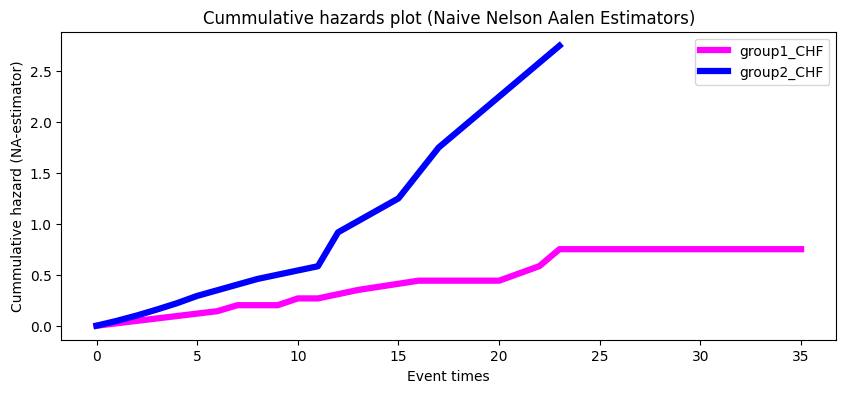

In [18]:
# Print and plotting some results:
if __name__ == "__main__":
    data = _build()
    print(f"\n-------------------------------------")
    print(data)
    print(f"\n-------------------------------------")
    res1 = NelsonAalen_raw(df = data)
    na, event_times,_,_ = res1
    print(f"\n-------------------------------------")
    print(na)
    print(f"\n-------------------------------------")
    print(event_times)
    print(f"\n-------------------------------------")
    res2 = NelsonAalen_raw(df = data, group= "g2")
    na, event_times,_,_ = res2
    print(na)
    print(f"The survival probabilities: {[math.exp(-chf) for chf in na]}")
    print(f"\n-------------------------------------")
    print(event_times)
    print(f"\n-------------------------------------")
    plot_CHF(kind = "CHF")

* # Comment on the above plot
* Answer here ...

In [19]:
# Print out the NA estimator for each group
print(f"\n-------------------------------------------------------")
res1 = NelsonAalen_raw(df = data)
na1, _,_,_ = res1
res2 = NelsonAalen_raw(df = data, group = "g2")
na2, _,_,_ = res2
print(f">>>> NA estimate for group 1: {na1}\
      \n>>>> NA estimate for group 2: {na2}")
print(f"\n-------------------------------------------------------")


-------------------------------------------------------
>>>> NA estimate for group 1: [0, 0.14285714285714285, 0.20168067226890757, 0.20168067226890757, 0.2683473389355742, 0.2683473389355742, 0.35168067226890753, 0.4425897631779985, 0.4425897631779985, 0.4425897631779985, 0.4425897631779985, 0.5854469060351413, 0.7521135727018079, 0.7521135727018079, 0.7521135727018079, 0.7521135727018079, 0.7521135727018079]      
>>>> NA estimate for group 2: [0, 0.047619047619047616, 0.10025062656641603, 0.15907415597818075, 0.22157415597818075, 0.29300272740675215, 0.4596693940734188, 0.5846693940734188, 0.9180027274067522, 1.2513360607400854, 1.7513360607400854, 2.751336060740085]

-------------------------------------------------------
